In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()
X = df.loc[:, ['H', 'S', 'Q', 'D50', 'D84', 'R']].values
y = df.loc[:, ['qs']].values

scaler1 = MinMaxScaler().fit(X)
X1 = scaler1.transform(X)
scaler2 = MinMaxScaler().fit(y)
y1 = scaler2.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()




In [5]:
# Create XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=2)

# Train the model
md = xgb_regressor.fit(X_train, y_train)



In [6]:
# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('MSE:', mse)

print('RMSE:', rmse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

MSE: 0.0009449145637239751
RMSE: 0.030739462645335475
R-squared: 0.9283549716879022
Mean Absolute Error: 0.007417712702721805


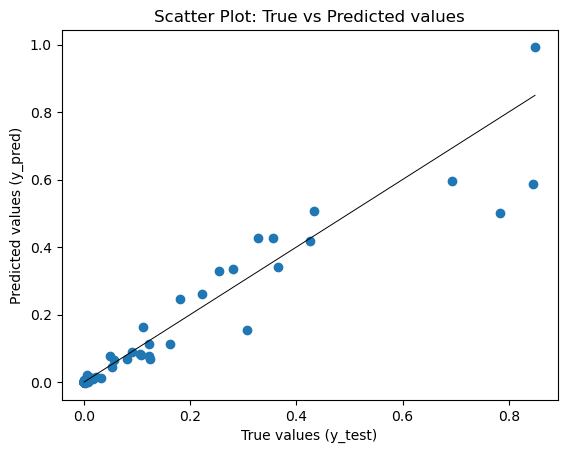

In [7]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()